# Construction of the $5$-manifolds

This notebook contains various computations pertaining to the construction of the closed $5$-manifolds
$N_{i,I}^\pm$. \
The code is divided into the following sections:

- **The Coxeter group $G$ and its subgroups** \
    Definition of the subgroups $C_{17}K, H_i, K_i$ and others.
- **First homology of $X_i$** \
    Computation of $H_1(X_i; \mathbb Z)$.
- **Subgroup lattice** \
    Checking various containment and normality relations between the subgroups of $G$.
- **The graph $\mathcal G$** \
    Construction of the graph $\mathcal G$.
- **The groups $\Lambda_i$** \
    Computation of the groups $\Lambda_i$.
- **Good independent sets** \
    Enumeration of all good independent sets up to the action of $\Lambda_i$.
- **The coloring** \
    Linear binary code / classification of the matrices $A^{(k)}$ up to left equivalence.
- **Data for first Betti number** \
    Generating the C++ code for the computation of $b_1(N_{i,I}^\pm)$.

In [1]:
import itertools
import functools
from sage.graphs.independent_sets import IndependentSets
from collections import defaultdict

In [2]:
def multiset(it):
    d = defaultdict(int)
    for k in it:
        d[k] += 1
    return dict(d)

def multimap(it):
    d = defaultdict(set)
    for k,v in it:
        d[k].add(v)
    return dict(d)

## The Coxeter group $G$ and its subgroups

In [3]:
def make_coxeter_group(F, edges):
    n = F.ngens()
    all_edges = {(i, j) : 1 if i == j else 2 for i in range(n) for j in range(i,n)}
    for a,b,e in edges:
        all_edges[min(a,b), max(a,b)] = e
    rels = [(F.gen(k[0])*F.gen(k[1]))^v for k,v in all_edges.items() if v >= 0 and v != oo]
    return F/rels

In [4]:
fr.<a,b,c,d,e> = FreeGroup()
cox_edges = [(0,1,5),(1,2,3),(2,3,3),(3,4,3)]
G = make_coxeter_group(fr, cox_edges); G

Finitely presented group < a, b, c, d, e | a^2, (a*b)^5, (a*c)^2, (a*d)^2, (a*e)^2, b^2, (b*c)^3, (b*d)^2, (b*e)^2, c^2, (c*d)^3, (c*e)^2, d^2, (d*e)^3, e^2 >

In [5]:
long_words = [
    a*b*c*d*e,
    b*a*b*c*b*a*b*a*c*b*a*d*c*e*d*c*b*a*b*a*c*d*e*b*c*a*b*a*b*c*d*c*b*a*b*c*a*b*a*b*c,
    b*a*b*c*b*a*d*c*b*a*b*a*c*b*a*d*e*d*c*b*a*b*c*d*e*a*b*a*b*c*d*b*a*b*c*a*b*a*b*c*d*c*b,
    b*c*b*a*b*a*d*c*b*a*b*a*c*b*a*b*c*d*c*b*a*b*a*c*d*b*c*a*b*a*b*c*d*e*b*c*a*b*a*b*c*d*b*a*b*c*a*b,
    b*a*b*a*c*d*c*b*a*b*a*c*b*a*d*c*b*a*b*c*d*e*d*c*b*a*b*c*d*a*b*c*a*b*a*b*c*d*e*b*a*b*c*d*b*c*a*b*a*b*c
]
w1,w2,w3,w4,w5 = long_words

In [6]:
long_gens = [
    [w2^-2, w3, w4*w2^-1, w4^-1*w2^-1, w2*w1*w2^-1, w2*w3*w2^-1, w1, w5],
    [w1, w2^-2, w3*w2^-1, w3^-1*w2^-1, w4*w2^-1, w4^-1*w2^-1, w5*w2^-1, w5^-1*w2^-1],
    [w1^-2, w2, w3, w4*w1^-1, w1*w2*w1^-1, w1*w3*w1^-1, w5],
    [w1^-2, w3*w1^-1, w3^-1*w1^-1, w2, w4*w1^-1, w5*w1^-1],
    
    [w1, w2^-2, w3, w4*w2^-1, w5*w2^-1, w2*w1*w2^-1, w2*w3*w2^-1, w4^-1*w2^-1, w5^-1*w2^-1],
    [w1, w2^-2, w3*w2^-1, w3^-1*w2^-1, w4*w2^-1, w4^-1*w2^-1, w5],
    [w1^-2, w3, w4*w1^-1, w1*w2*w1^-1, w2, w5*w1^-1, w5^-1*w1^-1],
    
    [w1^-2, w2, w5, w3*w1^-1, w4*w1^-1, w3^-1*w1^-1]
]

The above are generators for the fundamental groups of the Long manifolds. \
They are given in the order of Table 1 of Long's article, and generate the groups $H_1, H_4, H_5, H_8, H_2, H_3, H_6, H_7$; \
in our code they are respectively numbered `H[0], H[1], ..., H[7]`.

The group generated by `long_words` is $C_{17}K$ (`CK` in code).

In [7]:
CK = G.subgroup(long_words)

In [8]:
H = [G.subgroup(long_gen) for long_gen in long_gens]

In this notebook, the superscript $+$ (indicating intersection with the orientation subgroup $G^+$) \
will be denoted by the suffix `_ori`.

In [9]:
G_ori = G.subgroup([a*b,b*c,c*d,d*e])

In [10]:
libgap.Index(G, G_ori)

2

In [11]:
%time H_ori = [libgap.Intersection(Hi, G_ori) for Hi in H]

CPU times: user 5.9 s, sys: 71.9 ms, total: 5.97 s
Wall time: 5.94 s


Now we define the following objects:

- the subgroup $S = \langle a, c, e, decd, bacbab \rangle$;
- the subgroup $S^+ = S \cap G^+$;
- the actions $\rho$, $\rho^+$ of $G$ on the cosets of $S$, $S^+$ respectively;
- the normal core of $S$, i.e. $K = \ker \rho$;
- the subgroup $K^+ = K \cap G^+$;
- the subgroups $K_i = H_i \cap K$ (`Ks[j]` in code);
- the subgroups $K_i^+ = H_i \cap K^+ = K_i \cap G^+$ (`Ks_ori[j]` in code).

Note that $K$ is the intersection of all conjugates of $S$; since $G^+$ is normal in $G$, \
we have that $K^+ = K \cap G^+$ is the intersection of all conjugates of $S \cap G^+ = S^+$. In other words, $K^+ = \ker \rho^+$.

It follows that we can compute $K_i$ as $\ker(\rho\big|_{H_i})$ and $K_i^+$ as $\ker(\rho^+\big|_{H_i})$, which is faster than intersecting.

In [12]:
S = G.subgroup([a,c,e,d*e*c*d,b*a*c*b*a*b])

In [13]:
S_ori = libgap.Intersection(S, G_ori)

In [14]:
rho = libgap.FactorCosetAction(G, S)

In [15]:
rho_ori = libgap.FactorCosetAction(G, S_ori)

In [16]:
%time K = libgap.Kernel(rho)

CPU times: user 1.84 ms, sys: 0 ns, total: 1.84 ms
Wall time: 1.85 ms


In [17]:
%time K_ori = libgap.Kernel(rho_ori)

CPU times: user 4.79 ms, sys: 0 ns, total: 4.79 ms
Wall time: 4.97 ms


In [18]:
%time rho_H = [libgap.RestrictedMapping(rho, Hi) for Hi in H]

CPU times: user 2.72 ms, sys: 0 ns, total: 2.72 ms
Wall time: 2.73 ms


In [19]:
%time rho_ori_H = [libgap.RestrictedMapping(rho_ori, Hi) for Hi in H]

CPU times: user 5.66 ms, sys: 24 μs, total: 5.69 ms
Wall time: 5.63 ms


In [20]:
%time Ks = [libgap.Kernel(action) for action in rho_H]

CPU times: user 3min 39s, sys: 1.41 s, total: 3min 40s
Wall time: 3min 39s


In [25]:
%time Ks_ori = [libgap.Kernel(action) for action in rho_ori_H]

CPU times: user 3min 52s, sys: 1.44 s, total: 3min 54s
Wall time: 3min 53s


## First homology of $X_i$

We compute $H_1(X_i; \mathbb Z)$ as the abelianization of the fundamental group $K_i$.

In [21]:
%%time
for i, Ki in zip((1,4,5,8,2,3,6,7), Ks):
    ab = multiset(Ki.AbelianInvariants().sage())
    ab_str = " + ".join(f"Z_{m}^{ex}" for m, ex in sorted(ab.items()))
    print(f"H_1(X_{i}; Z) = {ab_str}")

H_1(X_1; Z) = Z_2^32 + Z_4^11
H_1(X_4; Z) = Z_2^32 + Z_4^11
H_1(X_5; Z) = Z_2^32 + Z_4^11
H_1(X_8; Z) = Z_2^32 + Z_4^11
H_1(X_2; Z) = Z_2^27 + Z_4^18
H_1(X_3; Z) = Z_2^27 + Z_4^18
H_1(X_6; Z) = Z_2^27 + Z_4^18
H_1(X_7; Z) = Z_2^27 + Z_4^17 + Z_8^1
CPU times: user 2min 10s, sys: 1.2 s, total: 2min 11s
Wall time: 2min 10s


## Subgroup lattice

We claim that the following relations hold:

**Index 2 subgroups**:
- $G^+ < G$
- $K^+ < K$
- $H_i < C_{17}K$
- $K_i < K$
- $K_i^+ < K^+$

**Quotients:**
- $G/K \simeq \mathrm O(5,4)$
- $G^+/K^+ \simeq \mathrm O(5,4)$
- $C_{17}K / K \simeq \mathbb Z_{17}$
- $H_i / K_i \simeq \mathbb Z_{17}$
- $H_i / K_i^+ \simeq \mathbb Z_{34}$

$[G : G^+] = 2$:

In [23]:
libgap.Index(G, G_ori)

2

$[K : K^+] = [G : K^+] / [G : K] = 2$:

In [24]:
(libgap.Index(G, K_ori), libgap.Index(G, K), libgap.Index(G, K_ori) / libgap.Index(G, K))

(1958400, 979200, 2)

$[C_{17}K : H_i] = 2$:

In [25]:
[libgap.Index(CK, Hi) for Hi in H]

[2, 2, 2, 2, 2, 2, 2, 2]

$[C_{17}K : K] = 17$, and by normality $C_{17}K / K \simeq \mathbb Z_{17}$:

In [26]:
rho.Image(CK).Size()

17

$[H_i : K_i] = 17$, implying $H_i / K_i = \mathbb Z_{17}$ since $K_i = \ker (\rho\big|_{H_i})$ is normal in $H_i$:

In [27]:
[rho.Image(Hi).Size() for Hi in H]

[17, 17, 17, 17, 17, 17, 17, 17]

It also follows that
$[K : K_i] = [H_i : K_i] / [H_i : K] = [H_i : K_i] \cdot [C_{17}K : H_i] / [C_{17}K : K] = 17 \cdot 2 / 17 = 2$.

$G/K \simeq \mathrm O(5,4)$:

In [28]:
libgap.IsomorphismTypeInfoFiniteSimpleGroup(rho.Image())

rec( name := "B(2,4) = O(5,4) ~ C(2,4) = S(4,4)", parameter := [ 2, 4 ], series := "B", shortname := "S4(4)" )

$G^+/K^+ \simeq \mathrm O(5,4)$:

In [29]:
libgap.IsomorphismTypeInfoFiniteSimpleGroup(rho_ori.Image(G_ori))

rec( name := "B(2,4) = O(5,4) ~ C(2,4) = S(4,4)", parameter := [ 2, 4 ], series := "B", shortname := "S4(4)" )

It remains to show that $H_i / K_i^+ \simeq \mathbb Z_{34}$. First we show $K_i^+ \triangleleft H_i$:

In [30]:
%time [libgap.IsNormal(Hi, Ki_ori) for Hi, Ki_ori in zip(H, Ks_ori)]

CPU times: user 3min 47s, sys: 1.6 s, total: 3min 48s
Wall time: 46min 17s


[true, true, true, true, true, true, true, true]

Hence, the quotients $H_i / K_i^+$ are either $\mathbb Z_{34}$ or $D_{34}$. \
However, we have order $2$ normal subgroups $K_i / K_i^+ \triangleleft H_i / K_i^+$, which only exist in $\mathbb Z_{34}$.

## The graph $\mathcal G$

We construct the vertex set of $\mathcal G$ using the permutation representation of $G$ on the 170 cosets of $S^+$.

In [40]:
Q = libgap.Image(rho_ori)

In [41]:
Sigma_bar = libgap.Subgroup(Q, [rho_ori.Image(G(g)) for g in (a,b,c,d)])

The image of $e$ is not in $\overline \Sigma$, hence $\mathcal G$ has no loops:

In [42]:
rho_ori.Image(G(e)) in Sigma_bar

False

In [43]:
print(f"The image of <a,b,c,d> in Q has size {Sigma_bar.Size()}")
print(f"Its orbits are:\n{Sigma_bar.Orbits().sage()}")

The image of <a,b,c,d> in Q has size 7200
Its orbits are:
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 27, 31, 32, 34, 36, 33, 37, 39, 41, 40, 38, 43, 45, 47, 46, 44, 49, 51, 53, 52, 29, 50, 55, 57, 59, 58, 35, 56, 61, 64, 66, 65, 62, 42, 63, 67, 70, 72, 71, 68, 48, 69, 73, 76, 77, 78, 79, 74, 75, 54, 80, 83, 84, 85, 86, 81, 82, 60, 87, 88, 92, 93, 94, 91, 89, 90, 95, 96, 100, 101, 102, 99, 97, 98, 103, 105, 106, 108, 110, 107, 104, 111, 113, 114, 116, 118, 115, 112, 119, 120, 121, 123, 126, 124, 127, 128, 129, 131, 134, 132, 135, 136, 137, 139, 142, 141, 143, 144, 145, 147, 150, 149, 151, 152, 153, 156, 157, 158, 159, 162, 163, 166], [109, 125, 122, 140, 138, 155, 154, 165, 164, 169], [117, 133, 130, 148, 146, 161, 160, 168, 167, 170]]


The $Q$-stabilizer of each "nice orbit" (i.e. $\overline \Sigma$-orbit of size 10) is $\overline \Sigma$:

In [44]:
nice_orbits = [tuple(sorted(l.sage())) for l in Sigma_bar.Orbits() if l.Size() == 10]
assert(all(Q.Stabilizer(nice, libgap.OnSets) == Sigma_bar for nice in nice_orbits))

Choose a standard nice orbit $\omega$. Then the $Q$-orbit of $\omega$ (as a set) is in bijection with $V(\mathcal G)$.

In [45]:
omega = nice_orbits[0]
omega

(109, 122, 125, 138, 140, 154, 155, 164, 165, 169)

In [46]:
vertices = sorted(tuple(sorted(orb.sage())) for orb in Q.Orbit(omega, libgap.OnSets))

In [47]:
vertex_to_index = {t: j for j, t in enumerate(vertices)}

In [48]:
def action_on_vertices(idx, el):
    """Computes the action of el (element of Q) on idx (index of a vertex of G)."""
    # The appearance of el^-1 is due to GAP using right cosets, while we use left cosets
    return vertex_to_index[tuple(libgap.OnSets(vertices[idx], el^-1).sage())]

In [49]:
coset_id = vertex_to_index[omega]
coset_e = action_on_vertices(coset_id, rho_ori.Image(G(e)))
(coset_id, coset_e)

(266, 262)

To obtain all edges of $\mathcal G$, we compute the $Q$-orbit of the edge
$(\overline \Sigma, e\overline \Sigma) = $ `(coset_id, coset_e)`.

In [50]:
edge_stab = Q.Stabilizer(sorted([vertices[coset_e], vertices[coset_id]]), libgap.OnSetsSets)
transversal_stab = Q.RightTransversal(edge_stab)
print(f"Size of edge stabilizer: {edge_stab.Size()}, size of transversal: {len(transversal_stab)}")
graph = Graph()
for el in transversal_stab.AsList():
    graph.add_edge(action_on_vertices(coset_id, el^-1), action_on_vertices(coset_e, el^-1))

Size of edge stabilizer: 240, size of transversal: 8160


## The groups $\Lambda_i$

Recall that the groups $\Lambda_i$ are defined as the normalizers of $\langle \psi \rangle$
in $\Pi_i \coloneqq N_G(K_i) / K_i^+$. We have
$$
    \Lambda_i = (N_G(K_i) \cap N_G(H_i^+)) / K_i^+.
$$
Indeed, note that the preimage of $\langle \psi\rangle$ in $G$ is the group $H_i^+ \coloneqq H_i \cap G^+$. Then:
\begin{align}
    \Lambda_i &= \{gK_i^+ \mid g \in N_G(K_i),\,\, (gK_i^+)^{-1}\cdot H_i^+\cdot (gK_i^+) = H_i^+ \}
    \\ &= \{gK_i^+ \mid g \in N_G(K_i),\,\, g^{-1}  H_i^+ g = H_i^+ \}
    \\ &= (N_G(K_i) \cap N_G(H_i^+)) / K_i^+.
\end{align}

In [21]:
psi = G((a*b*c*d*e)^2)

In [22]:
all(psi in Hi_ori for Hi_ori in H_ori)

True

In [23]:
psi in K

False

The above cells show that (a representative of) $\psi$ is in all $H_i^+$ but in no $K_i^+$. \
However, as expected, $\psi^{17} \in K_i^+$ for all $i$.

In [26]:
all(psi^17 in Ki_ori for Ki_ori in Ks_ori)

True

Let us define a subgroup $D \coloneqq \langle C_{17}K, adedba \rangle$ and verify that it normalizes $K_i$ and $H_i^+$ for all $i$:

In [27]:
D = G.subgroup(long_words + [G(a*d*e*d*b*a)])

In [69]:
%time all(libgap.IsNormal(D, Ki) for Ki in Ks)

CPU times: user 1min 25s, sys: 538 ms, total: 1min 26s
Wall time: 1min 25s


True

In [70]:
%time all(libgap.IsNormal(D, Hi_ori) for Hi_ori in H_ori)

CPU times: user 6.54 s, sys: 33.1 ms, total: 6.58 s
Wall time: 6.53 s


True

Hence, $D / K_i^+ < \Lambda_i$ for all $i$.
It follows that $\Lambda_i = L_i / K_i^+$ for some intermediate subgroups $D < L_i < G$. \
Since $D$ contains $K^+$, we shall find intermediate subgroups between $D/K^+$ and $G/K^+$.

In [28]:
Dq = libgap.Image(rho_ori, D)

In [29]:
Q = libgap.Image(rho_ori)

In [30]:
%time interm = libgap.IntermediateSubgroups(Q, Dq)

CPU times: user 1.35 s, sys: 57.9 ms, total: 1.41 s
Wall time: 1.96 s


In [31]:
interm

rec( inclusions := [ [ 0, 1 ], [ 0, 2 ], [ 0, 3 ], [ 1, 4 ], [ 1, 5 ], [ 2, 4 ], [ 3, 5 ], [ 4, 6 ], [ 5, 6 ] ], subgroups := [ <permutation group of size 136 with 3 generators>, <permutation group of size 8160 with 3 generators>, <permutation group of size 8160 with 3 generators>, <permutation group of size 16320 with 3 generators>, <permutation group of size 16320 with 3 generators> ] )

All intermediate subgroups $D = D_0 < D_1, D_2, \dots, D_5 < D_6 = G$ can be obtained by lifting through $\rho^+$:

In [32]:
intermediate_subgroups = [D] + [rho_ori.PreImage(sg) for sg in interm["subgroups"]] + [G]

Inclusions between `intermediate_subgroups`:

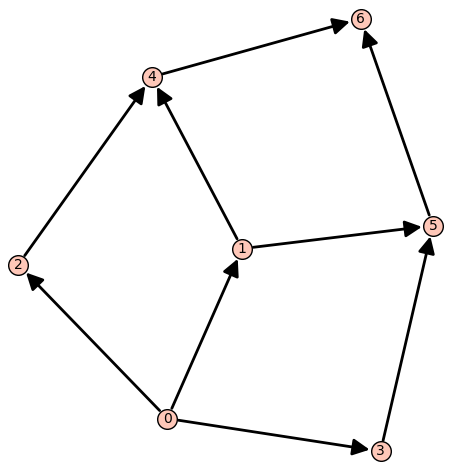

In [33]:
DiGraph(interm["inclusions"].sage()).plot()

Only $D_0 = D$ and $D_1$ normalize any (all) $H_i^+$:

In [34]:
%time [(j, [libgap.IsNormal(Dj, Hi) for Hi in H_ori]) for j, Dj in enumerate(intermediate_subgroups)]

CPU times: user 7.62 s, sys: 26 ms, total: 7.65 s
Wall time: 7.63 s


[(0, [true, true, true, true, true, true, true, true]),
 (1, [true, true, true, true, true, true, true, true]),
 (2, [false, false, false, false, false, false, false, false]),
 (3, [false, false, false, false, false, false, false, false]),
 (4, [false, false, false, false, false, false, false, false]),
 (5, [false, false, false, false, false, false, false, false]),
 (6, [false, false, false, false, false, false, false, false])]

Let's check if they normalize the $K_i$:

In [35]:
%time [(j, [libgap.IsNormal(Dj, Ki) for Ki in Ks]) for j, Dj in enumerate(intermediate_subgroups[:2])]

CPU times: user 1min 28s, sys: 450 ms, total: 1min 28s
Wall time: 1min 28s


[(0, [true, true, true, true, true, true, true, true]),
 (1, [false, true, true, false, true, false, false, true])]

In [36]:
%time [(j, [libgap.IsNormal(Dj, Ki) for Ki in Ks]) for j, Dj in enumerate(intermediate_subgroups)] # REMOVE

CPU times: user 152 ms, sys: 989 μs, total: 153 ms
Wall time: 153 ms


[(0, [true, true, true, true, true, true, true, true]),
 (1, [false, true, true, false, true, false, false, true]),
 (2, [false, false, false, false, true, true, true, true]),
 (3, [false, false, false, false, false, false, false, false]),
 (4, [false, false, false, false, true, false, false, true]),
 (5, [false, false, false, false, false, false, false, false]),
 (6, [false, false, false, false, false, false, false, false])]

Hence, $\Lambda_i$ is either $D$ (for $i=1,3,6,8$) or $D_1$ (for $i=2,4,5,7$).

(To obtain these indices, recall that in our code the manifolds are ordered as follows: `[1, 4, 5, 8, 2, 3, 6, 7]`. \
The actual indices in our code are `0,3,5,6` for $D$ and `1,2,4,7` for $D_1$.)

## Good independent sets

In this section we count good independent sets up to the action of $\Lambda_i$. \
The action of $\Lambda_i$ on $\mathcal G$ factors through $K^+$, hence we can pass to the quotient through $\rho^+$.

In [81]:
Lambda = [rho_ori.Image(Di) for Di in intermediate_subgroups[:2]]

In [38]:
Lambda = [rho_ori.Image(Di) for Di in intermediate_subgroups] # REMOVE

In [83]:
[l.Size() for l in Lambda]

[68, 136]

Since $|\Lambda_i| = [L_i : K_i^+] = 2[L_i : K^+]$,
this shows that $\Lambda_i$ has size $2 \cdot 68$ for $i = 1,3,6,8$ and size $2 \cdot 136$ for $i = 2,4,5,7$.

In [51]:
aut = graph.automorphism_group()

In [53]:
N_VERTS = graph.num_verts(); N_VERTS

272

In [54]:
def to_automorphism(g):
    """Given an element g in Q, returns the corresponding automorphism of the graph G."""
    return aut(
        SymmetricGroup(range(N_VERTS))(
            [action_on_vertices(j, g) for j in range(N_VERTS)]
        )
    )

In [55]:
def make_automorphism_subgroup(sg):
    """Given a subgroup sg < Q, returns the corresponding subgroup of automorphisms of the graph G."""
    return aut.subgroup([to_automorphism(gen) for gen in sg.GeneratorsOfGroup()])

In [56]:
Lambda_aut = [make_automorphism_subgroup(sg) for sg in Lambda]

In [62]:
[Lambda_aut[1].stabilizer(j).cardinality() for j in range(N_VERTS)] # REMOVE

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [36]:
psi = G((a*b*c*d*e)^2)

In [37]:
psi_aut = to_automorphism(rho_ori.Image(psi))

In [38]:
psi_aut

(266,152,80,159,190,225,84,251,264,228,49,234,14,63,44,236,255)(262,218,73,239,30,39,68,242,259,268,171,88,178,207,220,113,247)(150,204,237,155,226,20,3,16,32,127,260,172,147,48,145,187,47)(193,117,160,135,52,134,189,213,93,180,245,15,59,98,8,62,103)(233,4,19,0,56,102,256,153,166,72,139,195,71,169,185,243,174)(244,194,140,10,57,45,186,215,165,154,53,198,7,67,96,249,78)(227,250,79,74,252,257,131,175,116,265,212,51,164,219,216,89,133)(167,196,114,203,13,18,40,70,214,28,1,60,99,90,176,183,144)(254,106,156,87,263,199,75,142,229,223,81,108,217,253,55,50,248)(177,120,107,235,267,224,83,162,27,41,129,86,271,261,111,149,94)(210,163,22,42,125,137,130,230,182,21,37,122,222,170,9,58,101)(97,231,151,25,34,126,197,141,6,66,100,112,105,221,191,5,61)(200,118,161,240,31,35,123,24,38,128,208,92,179,110,76,109,206)(157,192,138,148,188,85,184,29,2,64,46,201,12,17,36,124,82)(246,54,238,209,146,26,33,69,205,202,143,173,77,211,23,43,121)(168,119,158,95,132,241,269,232,91,181,11,65,104,115,270,258,136)

Let us construct the auxiliary graph $\mathcal G'$ by adding the orbits of $\psi$ as cliques, and then taking the complement:

In [103]:
cliques17 = sorted(psi_aut.cycle_tuples(), key = lambda t: min(t))

In [104]:
for cli in cliques17:
    print(cli)

(233, 4, 19, 0, 56, 102, 256, 153, 166, 72, 139, 195, 71, 169, 185, 243, 174)
(167, 196, 114, 203, 13, 18, 40, 70, 214, 28, 1, 60, 99, 90, 176, 183, 144)
(157, 192, 138, 148, 188, 85, 184, 29, 2, 64, 46, 201, 12, 17, 36, 124, 82)
(150, 204, 237, 155, 226, 20, 3, 16, 32, 127, 260, 172, 147, 48, 145, 187, 47)
(97, 231, 151, 25, 34, 126, 197, 141, 6, 66, 100, 112, 105, 221, 191, 5, 61)
(244, 194, 140, 10, 57, 45, 186, 215, 165, 154, 53, 198, 7, 67, 96, 249, 78)
(193, 117, 160, 135, 52, 134, 189, 213, 93, 180, 245, 15, 59, 98, 8, 62, 103)
(210, 163, 22, 42, 125, 137, 130, 230, 182, 21, 37, 122, 222, 170, 9, 58, 101)
(168, 119, 158, 95, 132, 241, 269, 232, 91, 181, 11, 65, 104, 115, 270, 258, 136)
(266, 152, 80, 159, 190, 225, 84, 251, 264, 228, 49, 234, 14, 63, 44, 236, 255)
(246, 54, 238, 209, 146, 26, 33, 69, 205, 202, 143, 173, 77, 211, 23, 43, 121)
(200, 118, 161, 240, 31, 35, 123, 24, 38, 128, 208, 92, 179, 110, 76, 109, 206)
(177, 120, 107, 235, 267, 224, 83, 162, 27, 41, 129, 86, 27

In [107]:
def make_graph_with_cliques(g, cliques, relabel = False, remove_edges = []):
    """
    Adds cliques to a graph and optionally relabels the vertices to have cliques be contiguous intervals.

    Arguments:
    - g:            graph
    - cliques:      list of cliques to add
    - relabel:      whether to relabel the vertices
    - remove_edges: edges to optionally remove

    Returns:
    - if relabel is False: modified_graph
    - if relabel is True: a tuple (modified_graph, p, pi)
        where p, pi are permutations,
        applying p to modified_graph recovers the original labeling
        and pi is the inverse of p
    """
    g_cliques = Graph(g.edges(labels=False))
    for cli in cliques:
        g_cliques.add_clique(cli)
    g_cliques.delete_edges(remove_edges)
    if relabel:
        p = [j for cli in sorted(set(cliques)) for j in cli]
        pi = {j: k for k, j in enumerate(p)}
        g_cliques.relabel(pi)
        return g_cliques, p, pi
    return g_cliques

In [108]:
graph_aux, p, pi = make_graph_with_cliques(graph, cliques17, relabel=True)
graph_aux = graph_aux.complement()

In [109]:
%time maxcli = graph_aux.cliques_maximum()

CPU times: user 12.8 s, sys: 4.08 s, total: 16.9 s
Wall time: 17.4 s


In [110]:
len(maxcli)

13548660

In [111]:
%time indsets = [tuple(sorted(p[x] for x in cli)) for cli in maxcli]

CPU times: user 16.7 s, sys: 681 ms, total: 17.4 s
Wall time: 17.5 s


These are all the good independent sets. We check that their size is 16 and that they are actually independent sets:

In [112]:
%time all(len(ins) == 16 for ins in indsets)

CPU times: user 1.14 s, sys: 58 μs, total: 1.14 s
Wall time: 1.14 s


True

In [113]:
%time all(graph.is_independent_set(ins) for ins in indsets)

CPU times: user 4min, sys: 18 μs, total: 4min
Wall time: 4min 1s


True

In [127]:
indsets_set = set(indsets)

In [114]:
Lambda_lists = [list(sg) for sg in Lambda_aut]

In [131]:
def indset_orbit(ins, sg_idx):
    return list({tuple(sorted(g(x) for x in ins)) for g in Lambda_lists[sg_idx]})

In [138]:
def find_indset_orbits(sg_idx):
    _all_indsets = set(indsets)
    N = len(_all_indsets)
    orbit_lengths = defaultdict(int)
    orbit_representatives = []
    while _all_indsets:
        if (N - len(_all_indsets)) % 1000 == 0:
            percentage = float((N - len(_all_indsets))/N)
            print(f"{N-len(_all_indsets):>8} / {N} ( {percentage:>6.2%})", end = "\r", flush=True)
        ins = next(iter(_all_indsets))
        orbit_representatives.append(ins)
        orb = indset_orbit(ins, sg_idx)
        orbit_lengths[len(orb)] += 1
        for x in orb:
            _all_indsets.remove(x)
    print(f"{N:>8} / {N} (100.00%)")
    return dict(orbit_lengths), orbit_representatives

In [139]:
%time lengths0, indset_repr0 = find_indset_orbits(0)

13548660 / 13548660 (100.00%)
CPU times: user 5min 8s, sys: 382 ms, total: 5min 8s
Wall time: 5min 9s


In [140]:
lengths0

{68: 198436, 34: 1618}

In [142]:
%time lengths1, indset_repr1 = find_indset_orbits(1)

13548660 / 13548660 (100.00%)
CPU times: user 1min 41s, sys: 609 ms, total: 1min 42s
Wall time: 1min 42s


In [143]:
lengths1

{136: 99218, 68: 809}

Since $D < D_1$, the set of representatives `indset_repr0` also represents all orbits of $D_1$ (each orbit is represented twice).

Hence, we shall save only `indset_repr0` to a text file for future use.

In [144]:
%%time
with open("indsets.txt", "w") as fil:
    for ins in indset_repr0:
        fil.write(" ".join(str(x) for x in ins) + "\n")

CPU times: user 300 ms, sys: 6.58 ms, total: 306 ms
Wall time: 304 ms


## The coloring

Let us define the linear binary code $A$:
> _***Note:***_ The following cell may issue a warning, which can be ignored.

In [42]:
qr17 = codes.QuadraticResidueCode(17,GF(2))

In [43]:
A = qr17.generator_matrix(); A

[1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0]
[0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0]
[0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0]
[0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0]
[0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0]
[0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0]
[0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0]
[0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0]
[0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1]

In [44]:
B = qr17.parity_check_matrix(); B

[1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0]
[0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0]
[0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0]
[0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0]
[0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0]
[0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0]
[0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1]

We analyze a certain subset of the numberings of the colors,
corresponding to certain permutations of the columns $A_0, \dots, A_{16}$ of $A$.

Given a generator $\psi^k \in \langle \psi \rangle$ and a good independent set $I$, we assign:
- color $A_0$ to the facets of $I$;
- color $A_1$ to the facets of $\psi^k(I)$;
- ...
- color $A_j$ to the facets of $\psi^{kj}(I)$;
- ...
- color $A_{16}$ to the facets of $\psi^{k \cdot 16}(I)$.

This corresponds to defining a new matrix $A^{(k)}$ whose $kj$-th column is $A_j$, and assigning 
color $A^{(k)}_j$ to the facets of $\psi^j(I)$. \
Whenever $A^{(k)}$ is left equivalent to $A^{(k')}$, they determine isometric manifolds.

In [45]:
Ai = []
for k in range(1, 17):
    Ak = matrix(GF(2), 9, 17)
    for j in range(17):
        Ak.set_column(j*k%17, A.column(j))
    Ai.append((k, Ak))

The kernel of a matrix is a complete invariant with respect to left equivalence:

In [46]:
multimap((Ak.right_kernel(), k) for k, Ak in Ai)

{Vector space of degree 17 and dimension 8 over Finite Field of size 2
 Basis matrix:
 [1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1]
 [0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1]
 [0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1]: {1, 2, 4, 8, 9, 13, 15, 16},
 Vector space of degree 17 and dimension 8 over Finite Field of size 2
 Basis matrix:
 [1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1]
 [0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1]: {3, 5, 6, 7, 10, 11, 12, 14}}

Hence, we see that the resulting manifold only depends on the type of the chosen generator
$\psi^k \in \langle \psi \rangle$ \
(i.e. $+$ if $k \in \{1,2,4,8,9,13,15,16\}$ and $-$ if $k \in \{3,5,6,7,10,11,12,14\}$).

### DELETE THIS PART

In [92]:
def coloring(ins, Ak):
    """
    Returns a coloring of the graph G, associating to all vertices in psi^j(ins) the column Ak_j.
    """
    l = matrix(GF(2), 9, 272)
    part = [[] for _ in range(17)]
    for x in ins:
        for j in range(17):
            l.set_column(x, Ak.column(j))
            part[j].append(x)
            x = psi_aut(x)
    l.set_immutable()
    return l, part

In [157]:
ins100 = []
with open("indsets.txt", "r") as fil:
    for line in itertools.islice(fil, 10000):
        ins100.append([int(s) for s in line.split()])

In [149]:
def dod_rs(u0, v0):
    dod = sorted((set(graph[u0]).intersection(graph[v0])))
    col_x = col.matrix_from_columns([u0, v0] + dod)
    return col_x.echelon_form()[2:,2:].row_space()

In [138]:
def dod_rs2(u0, v0):
    dod = sorted(set(graph[u0]).intersection(graph[v0]))
    col_x = col.matrix_from_columns([u0, v0] + dod)
    return col_x.row_space()

In [144]:
def mindim(ins_idx, typ_plus, col2):
    col, part = coloring(ins100[ins_idx], Ai[0 if typ_plus else 2][1])
    uv = [(u,v) for u,v in sorted(itertools.product(part[0], part[col2])) if graph.has_edge(u,v)]
    return min(dod_rs(ux, vx).dimension() for ux, vx in uv)

In [158]:
%%time
a0, b0 = [[mindim(9000, ty, j) for j in range(1, 17)] for ty in (True, False)]
"".join(str(j) for j in a0) + "|" + "".join(str(j) for j in b0)

CPU times: user 507 ms, sys: 6.73 ms, total: 514 ms
Wall time: 508 ms


'6666666666666666|6666666666666666'

In [100]:
col, part = coloring(ins100[2], Ai[0][1])

In [115]:
uv = [(u,v) for u,v in sorted(itertools.product(part[0], part[3])) if graph.has_edge(u,v)]; uv

[(26, 76),
 (26, 183),
 (26, 204),
 (26, 205),
 (37, 49),
 (37, 76),
 (37, 170),
 (62, 25),
 (62, 76),
 (62, 183),
 (92, 0),
 (92, 25),
 (92, 183),
 (92, 204),
 (97, 10),
 (97, 25),
 (97, 49),
 (97, 76),
 (97, 117),
 (97, 170),
 (99, 27),
 (99, 262),
 (119, 108),
 (119, 170),
 (119, 183),
 (119, 205),
 (119, 262),
 (187, 27),
 (187, 108),
 (187, 117),
 (187, 170),
 (187, 205),
 (187, 227),
 (201, 0),
 (201, 10),
 (201, 27),
 (201, 76),
 (201, 204),
 (216, 27),
 (216, 36),
 (216, 183),
 (220, 36),
 (224, 36),
 (224, 117),
 (224, 132),
 (224, 204),
 (229, 25),
 (229, 117),
 (229, 205),
 (233, 262),
 (244, 10),
 (244, 27),
 (244, 36),
 (244, 117),
 (244, 170),
 (244, 227),
 (244, 262),
 (251, 0),
 (251, 27),
 (251, 36),
 (251, 76),
 (251, 183),
 (251, 205)]

In [116]:
multimap((dod_rs(ux, vx).dimension(), (ux, vx)) for ux, vx in uv)

{6: {(26, 76), (97, 10), (187, 227), (216, 27), (229, 25)},
 7: {(26, 183),
  (26, 204),
  (26, 205),
  (37, 49),
  (37, 76),
  (37, 170),
  (62, 25),
  (62, 76),
  (62, 183),
  (92, 0),
  (92, 25),
  (92, 183),
  (92, 204),
  (97, 25),
  (97, 49),
  (97, 76),
  (97, 117),
  (97, 170),
  (99, 27),
  (99, 262),
  (119, 108),
  (119, 170),
  (119, 183),
  (119, 205),
  (119, 262),
  (187, 27),
  (187, 108),
  (187, 117),
  (187, 170),
  (187, 205),
  (201, 0),
  (201, 10),
  (201, 27),
  (201, 76),
  (201, 204),
  (216, 36),
  (216, 183),
  (220, 36),
  (224, 36),
  (224, 117),
  (224, 132),
  (224, 204),
  (229, 117),
  (229, 205),
  (233, 262),
  (244, 10),
  (244, 27),
  (244, 36),
  (244, 117),
  (244, 170),
  (244, 227),
  (244, 262),
  (251, 0),
  (251, 27),
  (251, 36),
  (251, 76),
  (251, 183),
  (251, 205)}}

In [161]:
%time _cli_g = graph.cliques_maximum()

CPU times: user 21.4 ms, sys: 22 μs, total: 21.4 ms
Wall time: 30.9 ms


In [175]:
vcli = defaultdict(set)
for v in range(272):
    vn = [w for w in graph[v] if w < v]
    for cli in graph.subgraph(vn).cliques_maximal():
        vcli[v].add(tuple(sorted(cli)))

In [180]:
vcli[271]

{(0, 83, 147, 237),
 (0, 83, 147, 240),
 (0, 83, 164, 208),
 (0, 83, 164, 240),
 (0, 83, 208, 237),
 (0, 93, 140, 221),
 (0, 93, 140, 250),
 (0, 93, 164, 208),
 (0, 93, 164, 250),
 (0, 93, 208, 221),
 (0, 115, 140, 169),
 (0, 115, 140, 221),
 (0, 115, 147, 169),
 (0, 115, 147, 237),
 (0, 115, 221, 237),
 (0, 140, 169, 250),
 (0, 147, 169, 240),
 (0, 164, 240, 250),
 (0, 169, 240, 250),
 (0, 208, 221, 237),
 (4, 36, 186, 188),
 (4, 36, 186, 195),
 (4, 36, 188, 246),
 (4, 36, 195, 244),
 (4, 36, 244, 246),
 (4, 65, 168, 195),
 (4, 65, 168, 204),
 (4, 65, 171, 204),
 (4, 65, 171, 244),
 (4, 65, 195, 244),
 (4, 120, 128, 188),
 (4, 120, 128, 204),
 (4, 120, 168, 186),
 (4, 120, 168, 204),
 (4, 120, 186, 188),
 (4, 128, 171, 204),
 (4, 128, 171, 246),
 (4, 128, 188, 246),
 (4, 168, 186, 195),
 (4, 171, 244, 246),
 (5, 40, 197, 219),
 (5, 40, 197, 234),
 (5, 40, 211, 219),
 (5, 40, 211, 231),
 (5, 40, 231, 234),
 (5, 57, 143, 211),
 (5, 57, 143, 220),
 (5, 57, 211, 231),
 (5, 57, 220, 258),


In [183]:
for v in range(272):
    print("    VA {", end = "");
    print(", ".join(
        "{{" + ", ".join("FACETS" if t == -1 else str(t) for t in list(cli) + [-1]*(4-len(cli)) ) + "}}"
        for cli in sorted(vcli[v])
    ), end = "},\n")

    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{FACETS, FACETS, FACETS, FACETS}}},
    VA {{{

In [ ]:
VA {{{FACETS, FACETS, FACETS}}},

## Data for first Betti number

Here we prepare some data for the program `count-cc.cpp`, \
which is used to compute the first Betti number of $\widehat M_{i,I}^\pm$ using the Choi-Park formula.

More precisely, we print out C++ code to define:
- `graph`, representing the graph $\mathcal G$ in adjacency list format;
- `psi`, the permutation induced by $\psi$ on vertices of $\mathcal G$;
- `rowspace`, a list of binary vectors given by the union of rowspaces of $A^{(1)}$ (type $+$) and $A^{(3)}$ (type $-$). \
  The vectors $(0,0,0,0,0,0,0,0,0)$ and $(1,1,1,1,1,1,1,1,1)$ are ignored, as they give a connected or empty subgraph.

In [43]:
print("const int graph[272][60] = {")
for i in range(272):
    nb = sorted(graph[i])
    for k in range(3): # print in 3 lines
        print("    " 
              + ("{" if k == 0 else " ") 
              + ", ".join(str(j).rjust(3) for j in nb[k*20:(k+1)*20]) 
              + ("}," if k == 2 else ","))
print("};")

const int graph[272][60] = {
    { 80,  81,  82,  83,  92,  93,  94,  95, 105, 107, 111, 112, 113, 114, 115, 116, 131, 133, 134, 135,
     138, 139, 140, 147, 148, 149, 154, 155, 158, 160, 161, 163, 164, 165, 169, 172, 176, 178, 181, 184,
     191, 201, 208, 213, 218, 221, 222, 235, 237, 238, 239, 240, 242, 249, 250, 251, 263, 267, 268, 271},
    { 46,  51,  52,  54,  69,  74,  77,  79,  80,  81,  82,  83,  92,  93,  94,  95,  96, 100, 104, 113,
     114, 115, 116, 123, 126, 127, 141, 145, 150, 151, 167, 174, 175, 189, 190, 195, 196, 199, 203, 204,
     205, 210, 211, 215, 220, 226, 227, 228, 229, 234, 236, 245, 246, 247, 252, 253, 262, 265, 269, 270},
    { 45,  50,  53,  55,  68,  71,  72,  73,  80,  81,  82,  83,  92,  93,  94,  95,  98, 101, 102, 106,
     108, 109, 110, 113, 114, 115, 116, 122, 124, 128, 142, 146, 152, 157, 159, 162, 166, 170, 173, 182,
     186, 187, 192, 194, 198, 207, 212, 214, 219, 223, 224, 231, 233, 244, 248, 257, 259, 260, 261, 266},
    { 44,  47,  48,  49

In [44]:
psi = G((a*b*c*d*e)^2)
psi_q = rho_ori.Image(psi)
psi_perm = [action_on_vertices(j, psi_q) for j in range(272)]

In [45]:
print("const int psi[272] = {")
for i in range(16):
    print("    " + ", ".join(str(j).rjust(3) for j in psi_perm[i*17:(i+1)*17]) + ",")
print("};")

const int psi[272] = {
     56,  60,  64,  16,  19,  61,  66,  67,  62,  58,  57,  65,  17,  18,  63,  59,  32,
     36,  40,   0,   3,  37,  42,  43,  38,  34,  33,  41,   1,   2,  39,  35, 127,  69,
    126, 123, 124, 122, 128,  68,  70, 129, 125, 121, 236, 186, 201, 150, 145, 234, 248,
    164, 134, 198, 238,  50, 102,  45, 101,  98,  99,  97, 103,  44,  46, 104, 100,  96,
    242, 205, 214, 169, 139, 239, 252, 142, 109, 211, 244,  74, 159, 108, 157, 162, 251,
    184, 271, 263, 178, 133, 176, 181, 179, 180, 177, 132, 249, 231,   8,  90, 112, 210,
    256, 193, 115, 221, 156, 235, 217, 206,  76, 149, 105, 247, 203, 270, 265, 160, 161,
    158, 107, 246, 222,  24,  82, 137, 197, 260, 208,  86, 230, 175, 241, 227, 189,  52,
    168, 130, 148, 195,  10,   6, 229, 173, 167, 187,  26,  48, 188,  94, 204,  25,  80,
    166,  53, 226,  87, 192,  95, 190, 135, 240,  27,  22, 219, 154,  72, 196, 119, 185,
      9,  88, 147,  77, 233, 116, 183, 120, 207, 110, 245,  11,  21, 144,  29, 243, 215

In [46]:
def minrot(v):
    """Returns the smallest rotation of a vector v."""
    m = v
    for j in range(len(v)):
        v = vector([v[-1]] + list(v[:-1]))
        if v < m:
            m = v
    m.set_immutable()
    return m

In [47]:
rowspace = (sorted({minrot(v) for v in Ai[0][1].row_space() if any(v) and not all(v)})
          + sorted({minrot(v) for v in Ai[2][1].row_space() if any(v) and not all(v)}))

In [48]:
print("const int rowspace[" + str(len(rowspace)) + "][17] = {")
for v in rowspace:
    print("    {" + str(v)[1:-1] + "},")
print("};")

const int rowspace[60][17] = {
    {1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0},
    {1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0},
    {1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0},
    {1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0},
    {1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0},
    {1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0},
    {1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0},
    {1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0},
    {1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0},
    {1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0},
    {1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0},
    {1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0},
    {1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0},
    {1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0},
    {1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0},
    {1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0},
    {1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0},
